# Introduction

Recommender systems are being used to solve this problem and to provide users with recommendation as per their own personal preferences. Each individual has their unique interests and one’s preferences might change or get influenced by a number of factors. Although recommendation systems are not rare, developing a good recommendation system that provides accurate and appropriate recommendations is difficult. The Anime Dataset contains information on user preference data on around 16000 anime, with features such as rank of the anime, Japanese and English name of the anime, genre of the anime, number of episodes, production studio of anime, release season of the anime, release year of the anime, ratings of the users, etc. The goal of the project is to develop anime recommendation system that takes into account the user’s preferences to provide suggestions to the user. Before we start building a recommender system, we will start with exploratory data analysis and data cleaning. Various data pre-processing and preparation methods will be used such as missing values, feature selection, treatment of categorical values.

This dataset contains information about 17.562 anime and the preference from 325.772 different users. In particular, this dataset contain:
1. The anime list per user. Include dropped, complete, plan to watch, currently watching and on hold.
2. Ratings given by users to the animes that they has watched completely.
3. Information about the anime like genre, stats, studio, etc.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from collections import defaultdict
from scipy.sparse import csr_matrix
from surprise import KNNBasic, SVD
from surprise import Dataset, Reader
from surprise.accuracy import mae, rmse
from surprise.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Data Preprocessing

In [2]:
# Loading the datasets
anime_info = pd.read_csv('anime.csv')
anime_list = pd.read_csv('animelist.csv')
anime_synop = pd.read_csv('anime_with_synopsis.csv')
anime_rating = pd.read_csv('rating_complete.csv')

##### Exploring all the datasets

In [3]:
anime_info.shape

(17562, 35)

In [4]:
anime_list.shape

(109224747, 5)

In [5]:
anime_synop.shape

(16214, 5)

In [6]:
anime_info.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [7]:
anime_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [8]:
anime_info.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [9]:
anime_list.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


In [10]:
anime_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.1 GB


In [11]:
anime_list.describe()

,user_id,anime_id,rating,watching_status,watched_episodes
count,1.092247e+08,1.092247e+08,1.092247e+08,1.092247e+08,1.092247e+08
mean,1.768098e+05,1.649590e+04,4.245717e+00,3.087289e+00,1.210818e+01
std,1.018487e+05,1.379737e+04,3.912888e+00,1.774407e+00,1.463155e+02
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.849100e+04,3.194000e+03,0.000000e+00,2.000000e+00,0.000000e+00
50%,1.771420e+05,1.244500e+04,5.000000e+00,2.000000e+00,3.000000e+00
75%,2.651870e+05,3.083100e+04,8.000000e+00,6.000000e+00,1.200000e+01
max,3.534040e+05,4.849200e+04,1.000000e+01,5.500000e+01,6.553500e+04


In [12]:
anime_synop.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


In [13]:
anime_synop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genres     16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


In [14]:
anime_synop.describe()

,MAL_ID
count,16214.000000
mean,22069.271555
std,14849.798248
min,1.000000
25%,6728.500000
50%,24164.000000
75%,35978.750000
max,48492.000000


# Checking for NAN values

In [15]:
# Function to get the datatype, counts, distinct values, null values, missing percent and unique values
def description(data):
    no_rows = data.shape[0]
    types = data.dtypes
    counts = data.apply(lambda x: x.count())
    distincts = data.apply(lambda x: x.unique().shape[0])
    nulls=data.apply(lambda x: x.isnull().sum())
    nan_percent = (data.isnull().sum()/no_rows)*100
    uniques = data.apply(lambda x: x.unique())
    cols = {'Datatypes':types, 'Counts':counts, 'Distincts':distincts, 'Nulls':nulls,  
          'Missing Percent':nan_percent, 'Uniques':uniques}
    table = pd.DataFrame(data = cols)
    return table

In [16]:
details_info = description(anime_info)
details_info.reset_index(level = [0], inplace = True)
details_info.sort_values(by = 'Missing Percent', ascending = False)

,index,Datatypes,Counts,Distincts,Nulls,Missing Percent,Uniques
0,MAL_ID,int64,17562,17562,0,0.0,"[1, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22..."
26,Score-9,object,17562,3645,0,0.0,"[182126.0, 49201.0, 75651.0, 4806.0, 529.0, 14..."
20,Watching,int64,17562,3580,0,0.0,"[105808, 4143, 29113, 4300, 642, 13907, 11909,..."
21,Completed,int64,17562,7822,0,0.0,"[718161, 208333, 343492, 46165, 7314, 78349, 8..."
22,On-Hold,int64,17562,2915,0,0.0,"[71513, 1935, 25465, 5121, 766, 14228, 11901, ..."
23,Dropped,int64,17562,3035,0,0.0,"[26678, 770, 13925, 5378, 1108, 11573, 11026, ..."
24,Plan to Watch,int64,17562,7055,0,0.0,"[329800, 57964, 146918, 33719, 3394, 30202, 98..."
25,Score-10,object,17562,3379,0,0.0,"[229170.0, 30043.0, 50229.0, 2182.0, 312.0, 92..."
27,Score-8,object,17562,4515,0,0.0,"[131625.0, 49505.0, 86142.0, 10128.0, 1242.0, ..."
18,Members,int64,17562,9508,0,0.0,"[1251960, 273145, 558913, 94683, 13224, 148259..."


In [17]:
details_list = description(anime_list)
details_list.reset_index(level = [0],inplace = True)
details_list.sort_values(by = 'Missing Percent', ascending = False)

,index,Datatypes,Counts,Distincts,Nulls,Missing Percent,Uniques
0,user_id,int64,109224747,325770,0,0.0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,anime_id,int64,109224747,17562,0,0.0,"[67, 6702, 242, 4898, 21, 24, 2104, 4722, 6098..."
2,rating,int64,109224747,11,0,0.0,"[9, 7, 10, 0, 8, 6, 5, 4, 3, 2, 1]"
3,watching_status,int64,109224747,9,0,0.0,"[1, 2, 3, 4, 6, 0, 5, 33, 55]"
4,watched_episodes,int64,109224747,1464,0,0.0,"[1, 4, 0, 5, 2, 29, 79, 23, 3, 40, 26, 24, 51,..."


In [18]:
details_list = description(anime_synop)
details_list.reset_index(level = [0],inplace = True)
details_list.sort_values(by = 'Missing Percent', ascending = False)

,index,Datatypes,Counts,Distincts,Nulls,Missing Percent,Uniques
4,sypnopsis,object,16206,15222,8,0.04934,"[In the year 2071, humanity has colonized seve..."
0,MAL_ID,int64,16214,16214,0,0.00000,"[1, 5, 6, 7, 8, 15, 16, 17, 18, 19, 20, 21, 22..."
1,Name,object,16214,16210,0,0.00000,"[Cowboy Bebop, Cowboy Bebop: Tengoku no Tobira..."
2,Score,object,16214,532,0,0.00000,"[8.78, 8.39, 8.24, 7.27, 6.98, 7.95, 8.06, 7.5..."
3,Genres,object,16214,4857,0,0.00000,"[Action, Adventure, Comedy, Drama, Sci-Fi, Spa..."


##### From the above description, we can see that only the anime_aynop has NaN values. So, we will them now.

# Removing NAN values and verifying

In [19]:
anime_synop['sypnopsis'].fillna('Unknown',inplace = True)

In [20]:
anime_info['Score'] = anime_info['Score'].replace('Unknown', 0).astype(float)

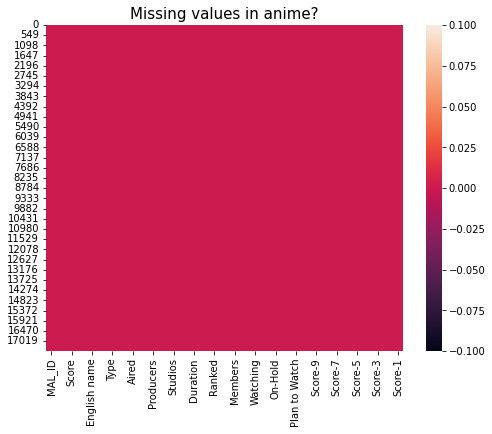

In [21]:
plt.figure(figsize = (8,6))
sns.heatmap(anime_info.isnull())
plt.title("Missing values in anime?", fontsize = 15)
plt.show()

# Exploratory Data Analysis

In [22]:
# Selecting the columns which will be used for exploratory data analysis
eda = anime_info[['MAL_ID', 'Name','English name', 'Score', 'Genres', 'Type', 'Aired', 'Premiered','Rating','Source','Episodes','Dropped']]

In [23]:
# Top five animes based on Score
anime_info.sort_values('Score',ascending = False).head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",Winter 2021,...,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,...,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,...,327290.0,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0
9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,...,78918.0,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0


In [24]:
# Distribution of animes based on the Medium of Streaming
labels = eda['Type'].value_counts().index
values = eda['Type'].value_counts().values
fig = go.Figure(data = [go.Pie(labels = labels, values = values)], layout = go.Layout(height = 600, width = 800))
fig.update_traces(hoverinfo ='label+percent', textinfo = 'value', textfont_size = 20, marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title = {'text': "Medium of Streaming", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [25]:
# Distribution of animes based on the Sources of Engagement
labels = eda['Source'].value_counts().index
values = eda['Source'].value_counts().values
fig = go.Figure(data = [go.Pie(labels = labels, values = values)], layout = go.Layout(height = 600, width = 800))
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20, marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title = {'text': "Sources of Engagement", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

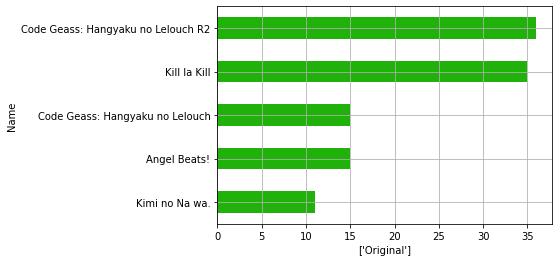

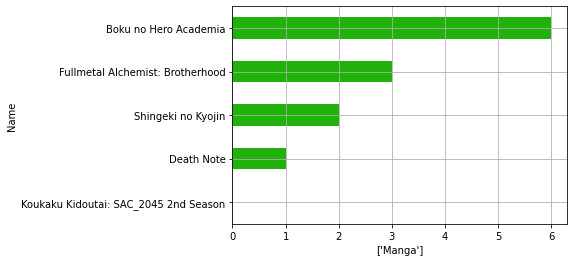

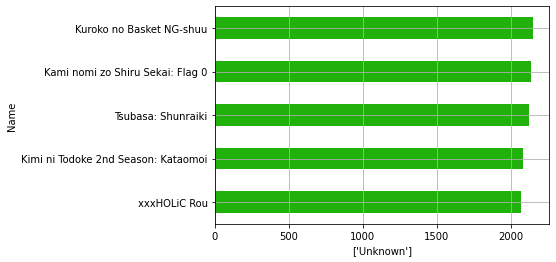

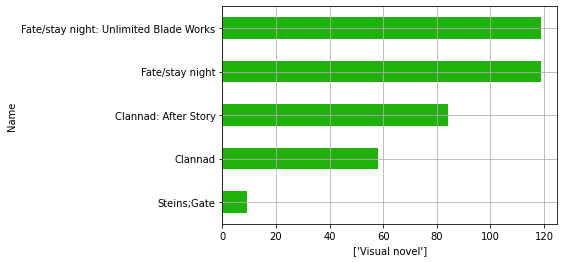

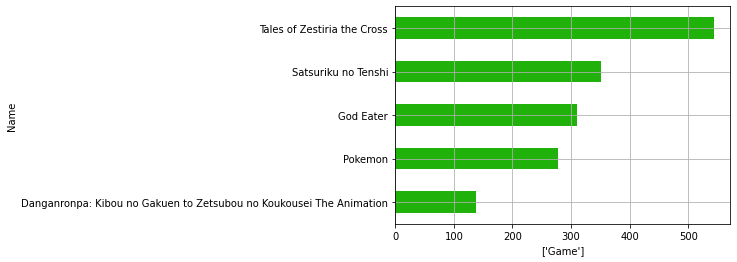

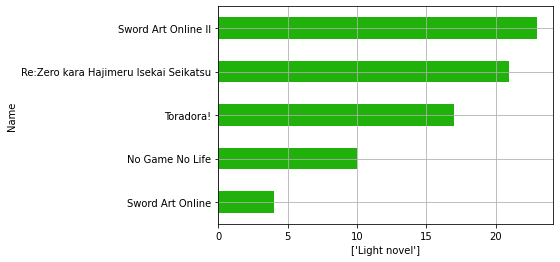

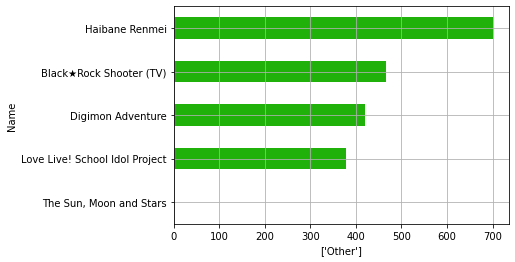

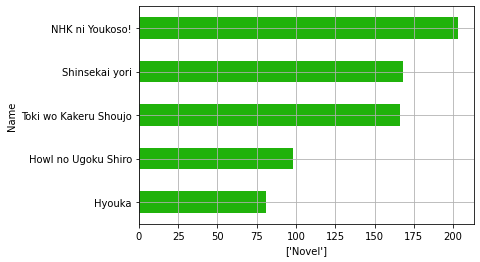

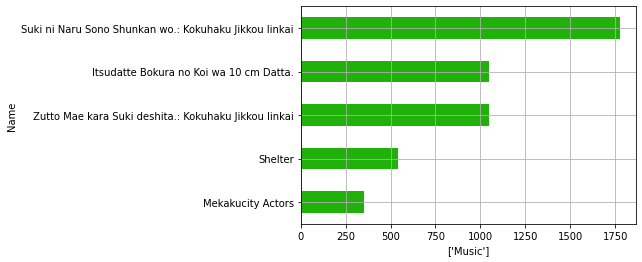

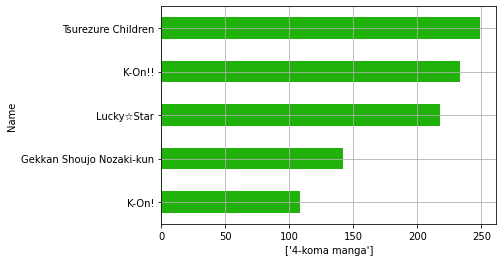

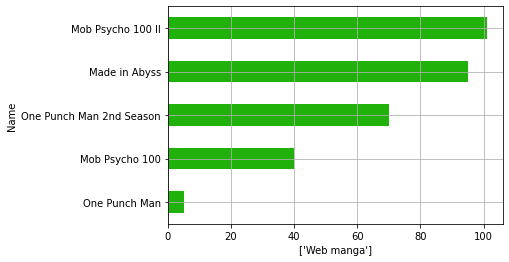

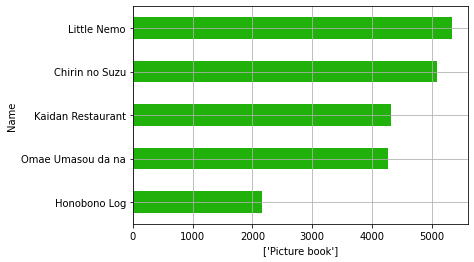

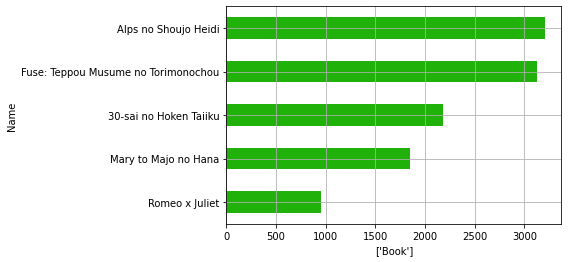

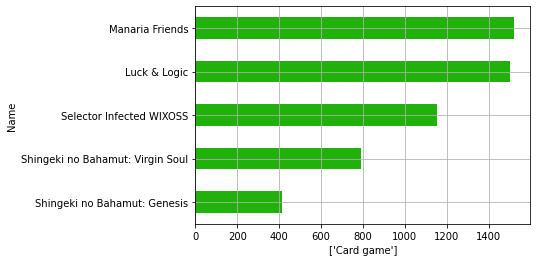

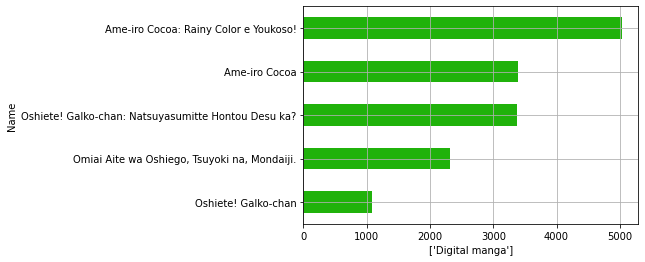

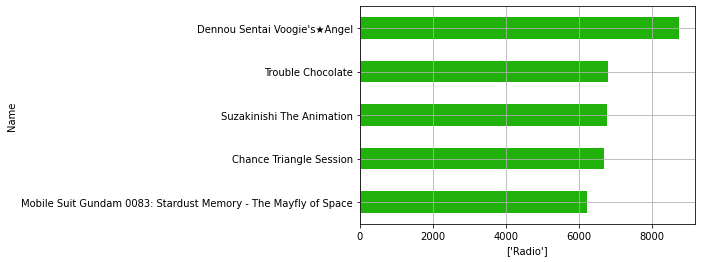

In [26]:
# Top five animes based on the Popularity in different source
source = anime_info.sort_values(by= 'Popularity').groupby('Source')[['Name','Popularity']]
for i in eda['Source'].value_counts().index:
    bar = source.get_group(i)
    bar.set_index('Name', inplace = True)
    bar.head().plot(kind = 'barh', legend = False, color = '#20b20b')
    plt.xlabel([i])
    plt.grid()  
plt.show()

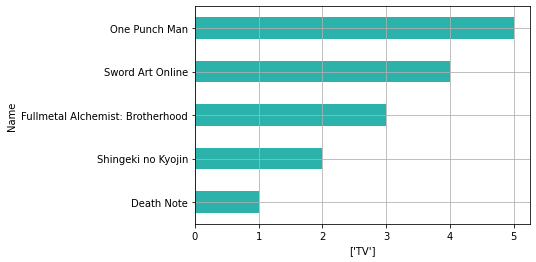

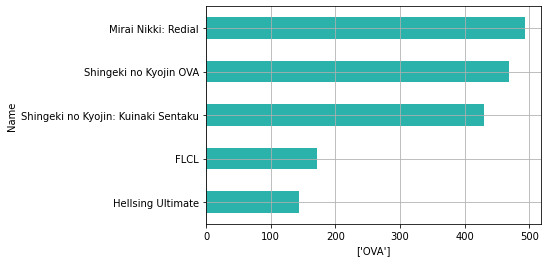

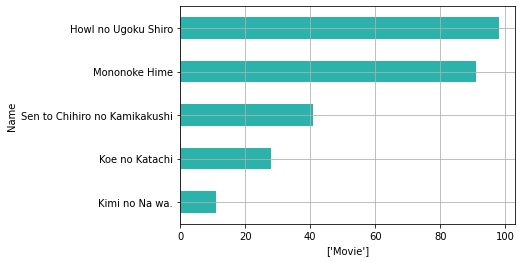

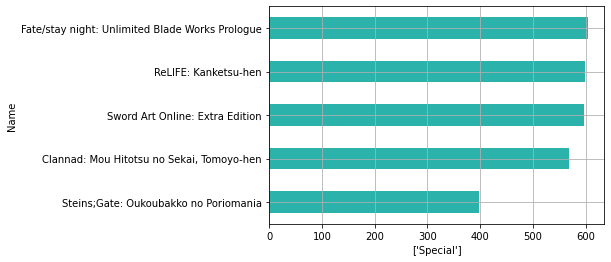

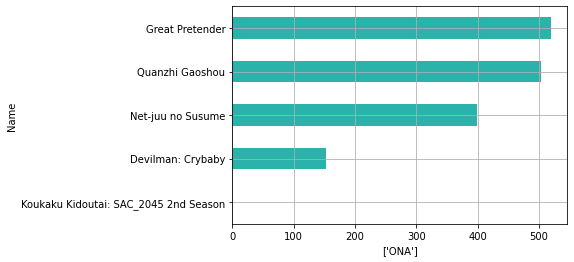

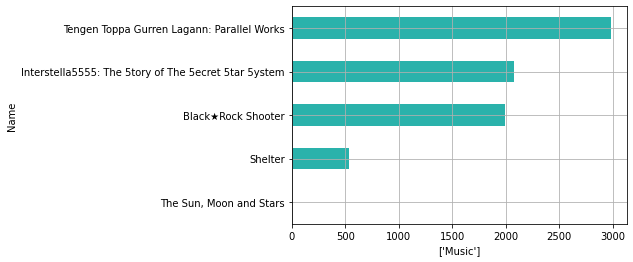

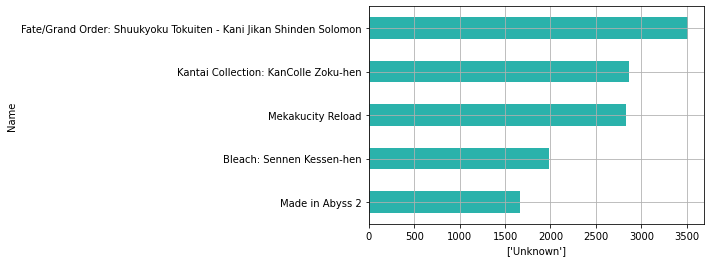

In [27]:
# Top five animes based on the Popularity in different types
type = anime_info.sort_values(by= 'Popularity').groupby('Type')[['Name','Popularity']]
for i in eda['Type'].value_counts().index:
    bar = type.get_group(i)
    bar.set_index('Name',inplace = True)
    bar.head().plot(kind = 'barh',legend =False, color = '#2ab2ab')
    plt.xlabel([i])
    plt.grid()   
plt.show()

In [28]:
# We are only taking 10000000 values from anime_list as it was not loading
anime_info.rename(columns = {'MAL_ID':'anime_id'}, inplace = True)
anime_list_partial = anime_list.iloc[:10000000,:]
anime_full_data = pd.merge(anime_info,anime_list_partial, on = 'anime_id')

In [29]:
anime_rating_count = (anime_full_data.groupby(by = ['Name'])['rating'].count().reset_index()[['Name', 'rating']])

Text(0, 0.5, 'User Rating count')

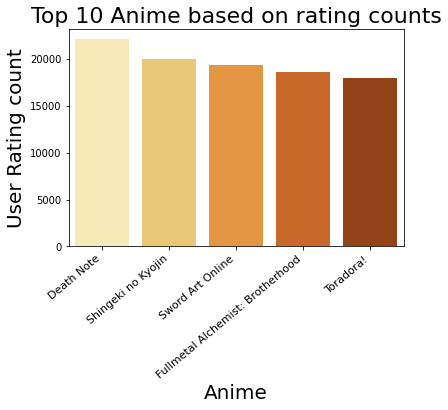

In [30]:
# Top five anime based on their ratings counts provided by the users
top5_anime_rating = anime_rating_count[['Name', 'rating']].sort_values(by = 'rating',ascending = False).head()
nl = sns.barplot(x = "Name", y = "rating", data = top5_anime_rating, palette = "YlOrBr")
nl.set_xticklabels(nl.get_xticklabels(), fontsize = 11, rotation = 40, ha = "right")
nl.set_title('Top 10 Anime based on rating counts',fontsize = 22)
nl.set_xlabel('Anime',fontsize = 20) 
nl.set_ylabel('User Rating count', fontsize = 20)

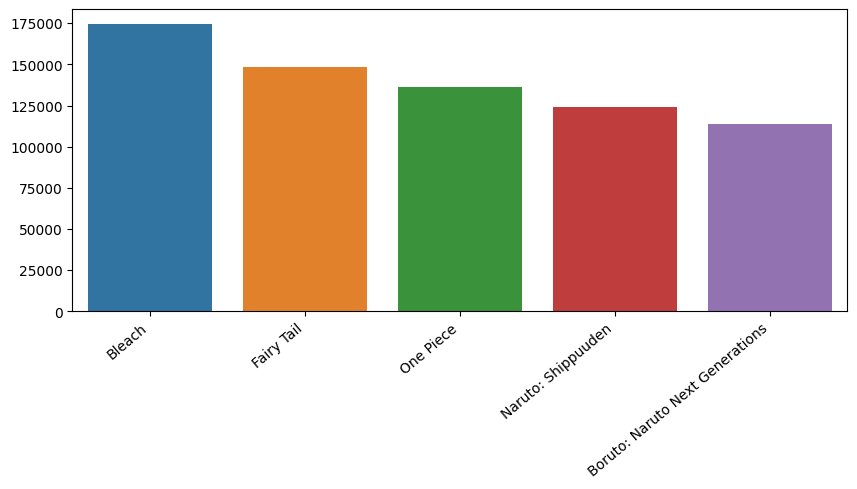

In [31]:
# Top five animes that were dropped by many users
drop = eda[['Name','Dropped']].sort_values(by = 'Dropped',ascending = False).head()
plt.figure(figsize = (10,4), dpi = 100)
sns.barplot(x = drop['Name'].unique(), y = drop['Dropped'].unique(), data = drop)
plt.xticks(rotation = 40, ha = 'right')
plt.show()

In [32]:
# Distribution of animes based on the rating 
labels = eda['Rating'].value_counts().index
values = eda['Rating'].value_counts().values
fig = go.Figure(data = [go.Pie(labels = labels, values = values)],layout = go.Layout(height = 600, width = 800))
fig.update_traces(hoverinfo = 'label+percent', textinfo = 'value', textfont_size = 20, marker = dict(line = dict(color = '#000000', width = 2)))
fig.update_layout(title = {'text': "Rating based Anime", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [33]:
anime_info['Studios'] = anime_info['Studios'].replace('Unknown', 0)
studios = anime_info['Studios'].value_counts().reset_index()
studios.rename(columns = {"index": "Studio", "Studios": "No of animes"})
studios = studios.drop(0).head()

In [34]:
# Distribution of animes based on the Production Studio
labels = studios['index'].unique()
values = studios['Studios'].unique()
fig = go.Figure(data = [go.Pie(labels = labels, values = values)], layout = go.Layout(height = 600, width = 800))
fig.update_traces(hole = .4,hoverinfo='label+percent', textinfo='value', textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title = {'text': "Anime Production by Studio", 'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.show()

In [35]:
#Configuration
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

##### Correlation Matrix

<AxesSubplot:>

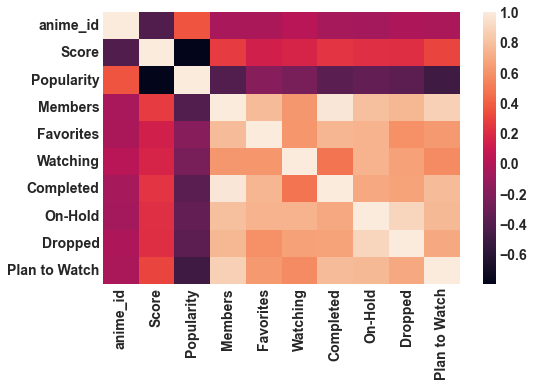

In [36]:
sns.heatmap(anime_info.corr())

In [37]:
# Function to replace values with mean
def replaceValueToMean(data, column, value):
    data[column] = data[column].replace(value, np.NaN)
    mean = int (data[column].mean(skipna=True))
    data[column] = data[column].replace(np.NaN, mean)

In [38]:
myanimes = pd.read_csv("anime.csv")

##### Preparing the data for further procedure

In [39]:
myanimes["Score"] = myanimes["Score"].replace('Unknown', np.NaN)
myanimes['Score'] = pd.to_numeric(myanimes['Score'])
replaceValueToMean(myanimes, 'Score', np.NaN)
myanimes['Score'] = myanimes['Score'].apply(np.ceil)
print(myanimes["Score"])

0        9.0
1        9.0
2        9.0
3        8.0
4        7.0
        ... 
17557    6.0
17558    6.0
17559    6.0
17560    6.0
17561    6.0
Name: Score, Length: 17562, dtype: float64


Text(0, 0.5, 'Popularity')

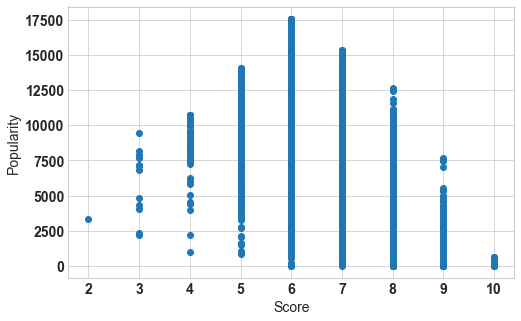

In [40]:
plt.scatter(myanimes['Score'],myanimes['Popularity'])
plt.xlabel("Score")
plt.ylabel("Popularity")

In [41]:
# Replacing the values
zeros_not_accepted = ['Popularity', 'Members', 'Favorites', 'Watching', 'On-Hold', 'Dropped', 'Plan to Watch']
for column in zeros_not_accepted:
    replaceValueToMean(myanimes, column, 0)

In [42]:
# Splitting the data in X and y
X = myanimes[['Popularity', 'Members', 'Favorites', 'Watching', 'On-Hold', 'Dropped', 'Plan to Watch']].values
y = myanimes['Score'].values
print("Array Shape X: {}".format(X.shape))
X

Array Shape X: (17562, 7)


array([[3.90000e+01, 1.25196e+06, 6.19710e+04, ..., 7.15130e+04,
        2.66780e+04, 3.29800e+05],
       [5.18000e+02, 2.73145e+05, 1.17400e+03, ..., 1.93500e+03,
        7.70000e+02, 5.79640e+04],
       [2.01000e+02, 5.58913e+05, 1.29440e+04, ..., 2.54650e+04,
        1.39250e+04, 1.46918e+05],
       ...,
       [1.75580e+04, 1.13090e+04, 4.80000e+01, ..., 1.00400e+03,
        1.20200e+03, 1.13060e+04],
       [1.75650e+04, 1.38600e+03, 2.00000e+00, ..., 2.00000e+00,
        1.00000e+00, 1.36800e+03],
       [1.75630e+04, 3.10000e+02, 6.76000e+02, ..., 1.00000e+00,
        1.00000e+00, 3.04000e+02]])

In [43]:
# Splitting the data into train and test for checking the accuracies.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Linear Regression

In [44]:
lr = LinearRegression().fit(X_train, y_train)
print("Predictions on the train set : {}".format(lr.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(lr.score(X_train, y_train)))
print("Predictions on the test set : {}".format(lr.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(lr.score(X_test, y_test)))

Predictions on the train set : [6.32252629 7.11536346 5.92807095 ... 8.48597567 7.19508724 6.78577143]
Accuracy on the train set : 0.57
Predictions on the test set : [7.2684999  6.87396227 6.54080852 ... 5.73186339 6.31583467 6.12876594]
Accuracy on the test set : 0.57


Ridge Regression

In [45]:
ridge = Ridge(alpha = 10).fit(X_train, y_train)
print("Predictions on the train set : {}".format(ridge.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(ridge.score(X_train, y_train)))
print("Predictions on the test set : {}".format(ridge.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(ridge.score(X_test, y_test)))

Predictions on the train set : [6.32252629 7.11536346 5.92807095 ... 8.48597567 7.19508724 6.78577143]
Accuracy on the train set : 0.57
Predictions on the test set : [7.2684999  6.87396227 6.54080852 ... 5.73186339 6.31583467 6.12876594]
Accuracy on the test set : 0.57


Lasso Regression

In [46]:
lasso = Lasso().fit(X_train, y_train)
print("Predictions on the train set : {}".format(lasso.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(lasso.score(X_train, y_train)))
print("Predictions on the test set : {}".format(lasso.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(lasso.score(X_test, y_test)))

Predictions on the train set : [6.32254052 7.11512116 5.92850538 ... 8.481725   7.19483678 6.7856333 ]
Accuracy on the train set : 0.57
Predictions on the test set : [7.26951384 6.87375857 6.54108163 ... 5.73234022 6.31615143 6.12914504]
Accuracy on the test set : 0.57


Logistic Regresssion

In [47]:
logreg = LogisticRegression(solver = 'liblinear', random_state = 0).fit(X_train, y_train)
print("Predictions on the train set : {}".format(logreg.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(logreg.score(X_train, y_train)))
print("Predictions on the test set : {}".format(logreg.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(logreg.score(X_test, y_test)))

Predictions on the train set : [6. 7. 6. ... 8. 7. 6.]
Accuracy on the train set : 0.67
Predictions on the test set : [7. 7. 6. ... 6. 6. 6.]
Accuracy on the test set : 0.68


Gaussian Naive Bayes

In [48]:
gnb = GaussianNB().fit(X_train, y_train)
print("Predictions on the train set : {}".format(gnb.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(gnb.score(X_train, y_train)))
print("Predictions on the test set : {}".format(gnb.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(gnb.score(X_test, y_test)))

Predictions on the train set : [5. 3. 6. ... 9. 3. 3.]
Accuracy on the train set : 0.33
Predictions on the test set : [7. 3. 5. ... 6. 5. 5.]
Accuracy on the test set : 0.34


Decision Tree Classifier

In [49]:
dt = DecisionTreeClassifier(max_depth = 10, random_state = 0).fit(X_train, y_train)
print("Predictions on the train set : {}".format(dt.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(dt.score(X_train, y_train)))
print("Predictions on the test set : {}".format(dt.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(dt.score(X_test, y_test)))

Predictions on the train set : [6. 8. 6. ... 8. 7. 7.]
Accuracy on the train set : 0.81
Predictions on the test set : [7. 7. 7. ... 6. 7. 6.]
Accuracy on the test set : 0.74


Decision Tree Regressor

In [50]:
dtr = DecisionTreeRegressor().fit(X_train, y_train)
print("Predictions on the train set : {}".format(dtr.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(dtr.score(X_train, y_train)))
print("Predictions on the test set : {}".format(dtr.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(dtr.score(X_test, y_test)))

Predictions on the train set : [6. 8. 6. ... 8. 7. 7.]
Accuracy on the train set : 1.00
Predictions on the test set : [8. 7. 7. ... 6. 6. 6.]
Accuracy on the test set : 0.44


Random Forest Classifier

In [51]:
rfc = RandomForestClassifier(n_estimators = 5, random_state = 0).fit(X_train, y_train)
print("Predictions on the train set : {}".format(rfc.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(rfc.score(X_train, y_train)))
print("Predictions on the test set : {}".format(rfc.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(rfc.score(X_test, y_test)))

Predictions on the train set : [6. 8. 6. ... 8. 7. 7.]
Accuracy on the train set : 0.97
Predictions on the test set : [7. 7. 6. ... 6. 6. 6.]
Accuracy on the test set : 0.72


Gradient Boosting Classifier

In [52]:
gbc = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01).fit(X_train, y_train)
print("Predictions on the train set : {}".format(gbc.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(gbc.score(X_train, y_train)))
print("Predictions on the test set : {}".format(gbc.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(gbc.score(X_test, y_test)))

Predictions on the train set : [6. 7. 6. ... 8. 7. 7.]
Accuracy on the train set : 0.73
Predictions on the test set : [7. 7. 6. ... 6. 6. 6.]
Accuracy on the test set : 0.71


Support Vector Classification

In [53]:
svm = SVC().fit(X_train, y_train)
print("Predictions on the train set : {}".format(svm.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(svm.score(X_train, y_train)))
print("Predictions on the test set : {}".format(svm.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(svm.score(X_test, y_test)))

Predictions on the train set : [6. 7. 6. ... 8. 7. 7.]
Accuracy on the train set : 0.68
Predictions on the test set : [7. 7. 6. ... 6. 6. 6.]
Accuracy on the test set : 0.68


In [54]:
svc = SVC(C = 1000).fit(X_train, y_train)
print("Predictions on the train set : {}".format(svc.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(svc.score(X_train, y_train)))
print("Predictions on the test set : {}".format(svc.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(svc.score(X_test, y_test)))

Predictions on the train set : [6. 7. 6. ... 8. 7. 7.]
Accuracy on the train set : 0.73
Predictions on the test set : [7. 7. 6. ... 6. 6. 6.]
Accuracy on the test set : 0.72


Multi-Layer Perceptron Classifier

In [55]:
mlp = MLPClassifier(random_state = 0).fit(X_train, y_train)
print("Predictions on the train set : {}".format(mlp.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(mlp.score(X_train, y_train)))
print("Predictions on the test set : {}".format(mlp.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(mlp.score(X_test, y_test)))

Predictions on the train set : [6. 7. 6. ... 8. 7. 7.]
Accuracy on the train set : 0.68
Predictions on the test set : [7. 7. 6. ... 6. 6. 6.]
Accuracy on the test set : 0.68


In [56]:
mlpc = MLPClassifier(max_iter = 1000, alpha = 1, random_state = 0).fit(X_train, y_train)
print("Predictions on the train set : {}".format(mlpc.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(mlpc.score(X_train, y_train)))
print("Predictions on the test set : {}".format(mlpc.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(mlpc.score(X_test, y_test)))

Predictions on the train set : [6. 6. 6. ... 8. 6. 6.]
Accuracy on the train set : 0.60
Predictions on the test set : [7. 6. 6. ... 6. 6. 6.]
Accuracy on the test set : 0.59


K Neighbors Classifier

In [57]:
knc = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
print("Predictions on the train set : {}".format(knc.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(knc.score(X_train, y_train)))
print("Predictions on the test set : {}".format(knc.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(knc.score(X_test, y_test)))

Predictions on the train set : [6. 8. 6. ... 8. 7. 7.]
Accuracy on the train set : 0.75
Predictions on the test set : [7. 6. 6. ... 6. 6. 6.]
Accuracy on the test set : 0.70


K Neighbors Regressor

In [58]:
knr = KNeighborsRegressor(n_neighbors = 9).fit(X_train, y_train)
print("Predictions on the train set : {}".format(knr.predict(X_train)))
print("Accuracy on the train set : {:.2f}".format(knr.score(X_train, y_train)))
print("Predictions on the test set : {}".format(knr.predict(X_test)))
print("Accuracy on the test set : {:.2f}".format(knr.score(X_test, y_test)))

Predictions on the train set : [6.22222222 7.55555556 6.         ... 8.         7.11111111 6.88888889]
Accuracy on the train set : 0.69
Predictions on the test set : [7.         6.66666667 6.33333333 ... 6.         6.11111111 6.        ]
Accuracy on the test set : 0.61


We can see from the above outputs that decision tree classifier, random forest classifier, gradient boosting classifier support vector classifier and K neigbors classifier perform pretty good. But K neighbors classifier generally performs good on recommendation dataset.

##### Preparing the data for getting recommendations

In [59]:
anime = pd.read_csv("anime.csv")
rating = pd.read_csv("rating_complete.csv")

In [60]:
anime = anime[['MAL_ID', 'Name', 'Genres', 'English name', 'Type', 'Rating']]

In [61]:
anime['English name'] = anime['English name'].replace(r'Unknown', np.NaN)
anime['English name'].fillna(anime.Name, inplace = True)

In [62]:
rating['rating_counts'] = rating.groupby("user_id")['rating'].transform('count')

In [63]:
rating['rating_mode'] = rating.groupby("user_id")['rating'].transform(lambda x: x.value_counts().idxmax())

In [64]:
rating['mode_max_count'] = rating.groupby("user_id")['rating'].transform(lambda x: x.value_counts().values.max())

In [65]:
rating['rating_min_mode'] = rating['rating_counts'] - rating['mode_max_count']

In [66]:
rating['mode_per'] = (round( rating['mode_max_count'] / rating['rating_counts'], 2))*100

In [67]:
rating = rating.drop(rating[rating.mode_per > 90].index)

In [68]:
x = rating['user_id'].value_counts() >= 500
x = x[x].index
rating = rating[rating['user_id'].isin(x)]

In [69]:
x = rating.groupby("user_id")['rating'].mean().sort_values(ascending=False) <= 9.749064
x = x[x].index
rating = rating[rating['user_id'].isin(x)]

In [70]:
x = rating['anime_id'].value_counts() >= 70
x = x[x].index
rating = rating[rating['anime_id'].isin(x)]

In [71]:
rating = anime.merge(rating, left_on = 'MAL_ID', right_on = 'anime_id')

In [72]:
rating = rating[['English name', 'user_id', 'anime_id', 'rating']]

In [73]:
anime_pivot = rating.pivot_table(columns = 'user_id', index = 'English name', values = 'rating')

In [74]:
anime_pivot.fillna(0, inplace = True)

We will building a Nearest Neighbors Model for giving Recommendations

In [75]:
# Nearest Neighbors Model
anime_sparse = csr_matrix(anime_pivot)
model = NearestNeighbors(algorithm = "brute")
model.fit(anime_sparse)

NearestNeighbors(algorithm='brute')

In [76]:
# Function to get anime recommendation given an anime name as an input
def anime_recommendation(anime_name):
    for anime_location in range(1,anime_pivot.shape[0]):
        if anime_name.lower() in anime_pivot.index[anime_location].lower():
            anime_location
            distances, suggestions = model.kneighbors(anime_pivot.iloc[anime_location, :].values.reshape(1,-1), n_neighbors = 10)
            for i in range(len(suggestions)):
                AnimeName = anime_pivot.index[suggestions[i][1:]]
                return AnimeName
            break  
    else:
        anime_location = None
        print("Anime Not Found")

Recommendations for different Animes

In [77]:
anime_recommendation("naruto")

Index(['Naruto: Shippuuden - Sunny Side Battle',
       'Boruto: Jump Festa 2016 Special',
       'Bleach KaraBuri!: Gotei Juusan Yatai Daisakusen!',
       'One Piece Film: Gold - Cine Mike Popcorn Kokuchi',
       'Kamiusagi Rope x Boruto: Naruto Next Generations',
       'Scratch x One Piece Film:Gold', 'Sono Me ga Mitsumeru Mono',
       'TOHO Cinemas x One Piece Film: Gold - Tokubetsu Eizou',
       'Dragon Ball Z: The Real 4-D'],
      dtype='object', name='English name')

In [78]:
anime_recommendation("attack on titan")

Index(['Sword Art Online', 'One Punch Man', 'Attack on Titan Season 2',
       'No Game, No Life', 'Tokyo Ghoul', 'Angel Beats!', 'Noragami:Stray God',
       'Death Note', 'My Hero Academia'],
      dtype='object', name='English name')

In [79]:
anime_recommendation("death note")

Index(['Attack on Titan', 'Code Geass:Lelouch of the Rebellion',
       'Code Geass:Lelouch of the Rebellion R2', 'Angel Beats!',
       'Sword Art Online', 'Fullmetal Alchemist:Brotherhood', 'One Punch Man',
       'The Future Diary', 'Toradora!'],
      dtype='object', name='English name')

In [80]:
anime_recommendation("Naruto:Shippuden")

Index(['The Last:Naruto the Movie', 'Boruto:Naruto the Movie',
       'Road to Ninja:Naruto the Movie',
       'Naruto: Shippuuden Movie 5 - Blood Prison',
       'Naruto: Shippuuden Movie 4 - The Lost Tower', 'Fairy Tail Series 2',
       'Naruto', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono',
       'Naruto:Shippuden the Movie 2 -Bonds-'],
      dtype='object', name='English name')

In [81]:
anime_recommendation("fairy tail")

Index(['Fairy Tail Series 2', 'Fairy Tail Movie 1: Houou no Miko',
       'Fairy Tail OVA', 'Bleach', 'Blue Exorcist', 'Naruto', 'Tokyo Ghoul √A',
       'Beelzebub', 'Fairy Tail x Rave'],
      dtype='object', name='English name')

In [82]:
anime_recommendation("bleach")

Index(['Bleach the Movie:Hell Verse', 'Bleach the Movie:Fade to Black',
       'Bleach the Movie:The DiamondDust Rebellion',
       'Bleach the Movie:Memories of Nobody', 'Naruto', 'Fairy Tail',
       'Naruto:Shippuden', 'Bleach:Memories in the Rain',
       'Bleach: The Sealed Sword Frenzy'],
      dtype='object', name='English name')

In [83]:
anime_recommendation("One Punch Man")

Index(['Attack on Titan', 'My Hero Academia', 'No Game, No Life',
       'KonoSuba:God's Blessing on This Wonderful World!',
       'Re:ZERO -Starting Life in Another World-', 'Sword Art Online',
       'Noragami:Stray God', 'The Devil is a Part-Timer!', 'Overlord'],
      dtype='object', name='English name')

In [84]:
anime_recommendation("black clover")

Index(['Black Clover:The All Magic Knights Thanksgiving Festa',
       'Squishy! Black Clover', 'Hakyu Hoshin Engi Recap', 'Fairy Ngoo',
       'Taishou Mebiusline: Chicchai-san - You and I',
       'Hakyu Hoshin Engi:The Blood of the Koh Family',
       'Animegatari x Shingeki no Kyojin Collab Eizou',
       'Karakuri Circus (TV): Makuai - Soshite Mata Kaimaku Bell',
       'Dies Irae: Irasshai Zonnenji'],
      dtype='object', name='English name')

In [85]:
anime_recommendation("My Hero Academia")

Index(['My Hero Academia 2', 'My Hero Academia 3', 'One Punch Man',
       'Re:ZERO -Starting Life in Another World-', 'Tokyo Ghoul',
       'The Seven Deadly Sins',
       'KonoSuba:God's Blessing on This Wonderful World!', 'Mob Psycho 100',
       'Attack on Titan'],
      dtype='object', name='English name')

In [86]:
anime_recommendation("The Seven Deadly Sins")

Index(['My Hero Academia', 'Tokyo Ghoul',
       'Is It Wrong to Try to Pick Up Girls in a Dungeon?', 'Akame ga Kill!',
       'The Seven Deadly Sins:Revival of the Commandments', 'Overlord',
       'Noragami:Stray God', 'The Seven Deadly Sins:Signs of Holy War',
       'Sword Art Online II'],
      dtype='object', name='English name')

In [87]:
anime_recommendation("Jujutsu Kaisen")

Index(['Tokyo',
       'Rudolf to Ippaiattena x Godzilla x Toho Cinemas Moving Logo Eizou',
       'I Like It', 'Forest Fairy Five ~Fairy Tale~', '123', 'Chicken Papa',
       'This Mayonnaise is too Liquid.', 'Usatalk', 'Hakuchuu Meikyuu'],
      dtype='object', name='English name')

In [88]:
anime_recommendation("Luminous Witches")

Anime Not Found


The biggest problem encountered was the size of the dataset which made it quite difficult to handle. The future scope of this project would be to implement it on machine that can handle the huge amount of data. As a result, in order to select the better model, we must also evaluate the rankings of our actual Top N forecasts. On our dataset, we will try to use deep learning approaches such as the RBF algorithm and compare the outcomes. Rankings, Hit Rate, and more accuracy metrics will be added in the future. We can develop a cross recommender system in the future. Cross platform recommender systems (CPRS) can assist recommendations in target platform based on the knowledge learned from the source platform.  